# ECG Signal Classification with Deep Learning: Leveraging Convolutional Neural Networks(CNN) for Accurate Arrhythmia Detection

### Connecting with the Google driver

DataSet Used: MIT-BIH Arrhythmia Database

https://drive.google.com/file/d/1qyX9jijxe-p9H3_Itjs-DJRzAht2NPvN/view?usp=drive_link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


kaggle ECG Dataset: https://www.kaggle.com/datasets/sadmansakib7/ecg-arrhythmia-classification-dataset

### Importing the required dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import classification_report

import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Conv1D, MaxPool1D, Input, MaxPooling1D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import to_categorical

### Loading and Analysing the ECG Dataset

Loading ECG Dataset

In [ ]:
filepath = '/content/drive/MyDrive/ECG Dataset/MIT-BIH Arrhythmia Database.csv'
data = pd.read_csv(filepath)

Exploratory ECG Dataset Analysis

In [ ]:
data.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [ ]:
data.shape

(100689, 34)

In [ ]:
data.keys()

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [ ]:
data.isnull().sum()

record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [ ]:
data.describe()

,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,...,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000
mean,173.730984,279.400947,278.588207,0.049772,0.372262,1.054485,-0.134376,-0.090466,28.326858,10.972817,...,-0.321359,11.212347,10.487163,36.112922,14.413412,-0.321359,-0.317836,-0.308809,-0.294919,-0.366798
std,51.673158,81.915453,81.124963,0.168789,0.739879,0.617508,1.027590,0.189436,15.027789,9.468930,...,0.447444,12.043096,8.799687,17.419760,9.118872,0.447444,0.456949,0.518043,0.593426,0.584913
min,100.000000,11.000000,6.000000,-3.094391,-2.006422,-2.372835,-3.622550,-3.871359,0.000000,1.000000,...,-5.481982,0.000000,1.000000,5.000000,1.000000,-5.481982,-4.493784,-4.398122,-4.069726,-4.520327
25%,115.000000,230.000000,230.000000,-0.054749,-0.249060,0.754047,-0.781784,-0.133274,18.000000,5.000000,...,-0.529435,3.000000,5.000000,25.000000,10.000000,-0.529435,-0.537288,-0.603469,-0.622269,-0.673902
50%,203.000000,267.000000,266.000000,0.015865,0.240303,1.105142,-0.516340,-0.069539,27.000000,7.000000,...,-0.111843,7.000000,8.000000,33.000000,12.000000,-0.111843,-0.115650,-0.151890,-0.196801,-0.262222
75%,219.000000,324.000000,322.000000,0.125809,0.928176,1.424135,0.857247,-0.014636,38.000000,16.000000,...,-0.028438,18.000000,13.000000,45.000000,17.000000,-0.028438,-0.016348,0.016088,0.040575,-0.052769
max,234.000000,2114.000000,2114.000000,3.821118,4.118327,4.018918,4.018918,3.080710,170.000000,150.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,2.691557,3.755566,2.869186


##### Extracted features and labels from the dataset

### Data Preprocessing

Drop rows with missing values

In [ ]:
data.dropna(inplace=True)

##### Extracted features and labels from the dataset

In [ ]:
x_data = data.iloc[:, 2:].astype(float)
y_label = data['type']

In [ ]:
value_counts = y_label.value_counts()
print(value_counts)

N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: type, dtype: int64


In [ ]:
labels = value_counts.index.tolist()
labels

['N', 'VEB', 'SVEB', 'F', 'Q']

##### Handled class imbalance by resampling data

Visualized data distribution and class proportions using pie charts

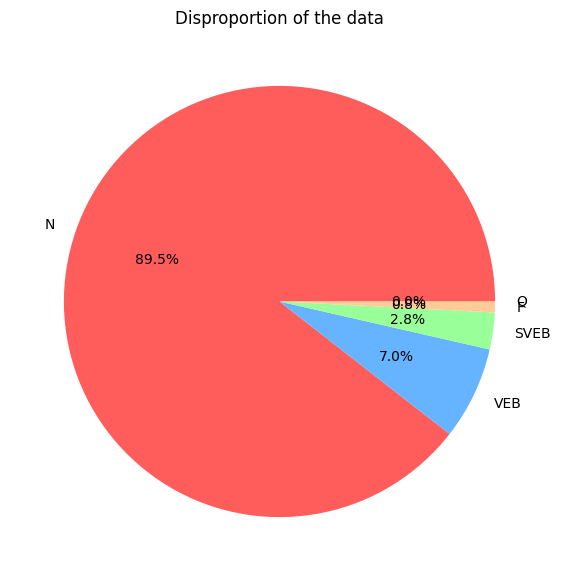

In [ ]:
plt.figure(figsize=(7, 7))
my_circle = plt.Circle((0, 0), 0.7, color='white')

value_counts = y_label.value_counts()
labels = value_counts.index.tolist()

plt.pie(value_counts, labels=labels, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Disproportion of the data')
plt.show()

In [ ]:
original_class_distribution = data['type'].value_counts()
print("Original class distribution:")
print(original_class_distribution)

Original class distribution:
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: type, dtype: int64


In [ ]:
majority_class = original_class_distribution.idxmax()
majority_class_count = original_class_distribution.max()

target_samples = majority_class_count

upsampled_data = pd.DataFrame()
target_samples = data['type'].value_counts().max()
for label in data['type'].unique():
    class_data = data[data['type'] == label]
    if len(class_data) < target_samples:
        upsampled_data = pd.concat([upsampled_data, resample(class_data, replace=True, n_samples=target_samples, random_state=42)])
    else:
        upsampled_data = pd.concat([upsampled_data, class_data])

balanced_class_distribution = upsampled_data['type'].value_counts()
print("\nBalanced class distribution:")
print(balanced_class_distribution)


Balanced class distribution:
N       90083
Q       90083
SVEB    90083
VEB     90083
F       90083
Name: type, dtype: int64


Plot pie charts for the original and balanced class distributions

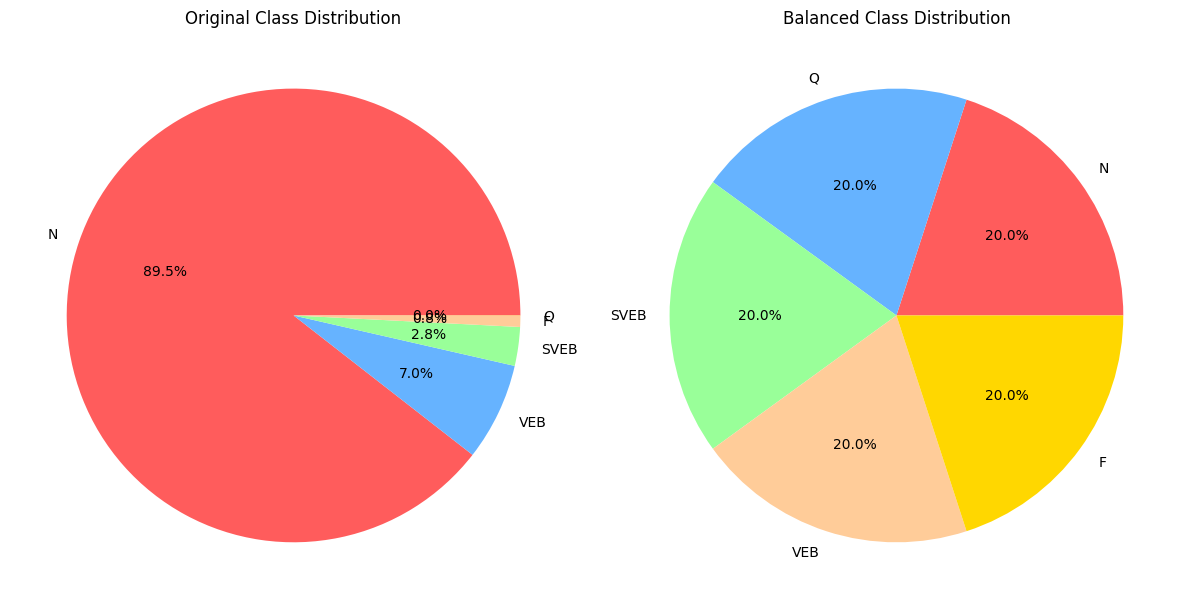

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(original_class_distribution, labels=original_class_distribution.index, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Original Class Distribution')

plt.subplot(1, 2, 2)
plt.pie(balanced_class_distribution, labels=balanced_class_distribution.index, autopct='%1.1f%%', colors=['#FF5C5C', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Balanced Class Distribution')

plt.tight_layout()
plt.show()


Resampled data

In [ ]:
x_data = upsampled_data.iloc[:, 2:]
y_label = upsampled_data['type']

### Label Encoding

In [ ]:
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y_label)

### Data Splitting

Split the data into training and testing sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label_encoded, test_size=0.2, random_state=42)

### Scaling and Reshape

Scaled the feature data

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Reshape for CNN input

In [ ]:
x_train_reshaped = x_train_scaled[..., np.newaxis]
x_test_reshaped = x_test_scaled[..., np.newaxis]

print("x_train_reshaped shape:", x_train_reshaped.shape)
print("y_train shape:", y_train.shape)
print("x_test_reshaped shape:", x_test_reshaped.shape)
print("y_test shape:", y_test.shape)

x_train_reshaped shape: (360332, 32, 1)
y_train shape: (360332,)
x_test_reshaped shape: (90083, 32, 1)
y_test shape: (90083,)


### Model Architecture


Defined a Convolutional Neural Network (CNN) model using TensorFlow and Keras

In [ ]:
# !pip install --upgrade tensorflow

In [ ]:
model = Sequential([
    Input(shape=(x_train_reshaped.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

Compile the model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Model Training and Evaluation

Train the model

In [ ]:
history = model.fit(x_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
9009/9009 [==============================] - 68s 7ms/step - loss: 0.1131 - accuracy: 0.9642 - val_loss: 0.0536 - val_accuracy: 0.9828
Epoch 2/10
9009/9009 [==============================] - 74s 8ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0569 - val_accuracy: 0.9840
Epoch 3/10
9009/9009 [==============================] - 62s 7ms/step - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.0297 - val_accuracy: 0.9912
Epoch 4/10
9009/9009 [==============================] - 53s 6ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0213 - val_accuracy: 0.9937
Epoch 5/10
9009/9009 [==============================] - 51s 6ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0162 - val_accuracy: 0.9956
Epoch 6/10
9009/9009 [==============================] - 55s 6ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0164 - val_accuracy: 0.9956
Epoch 7/10
9009/9009 [==============================] - 51s 6ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.0177 - val_ac

Evaluate the model on the test set

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=0)
print(f'Test set accuracy: {test_accuracy * 100:.2f}%')

Test set accuracy: 99.69%


### Confusion Matrix and Classification Report

 Making predictions on the test set

In [ ]:
y_test_pred_probs = model.predict(x_test_reshaped)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
print(y_test_pred)

2816/2816 [==============================] - 6s 2ms/step
[4 3 1 ... 0 2 1]


Generated a confusion matrix and visualization for better understanding of model performance

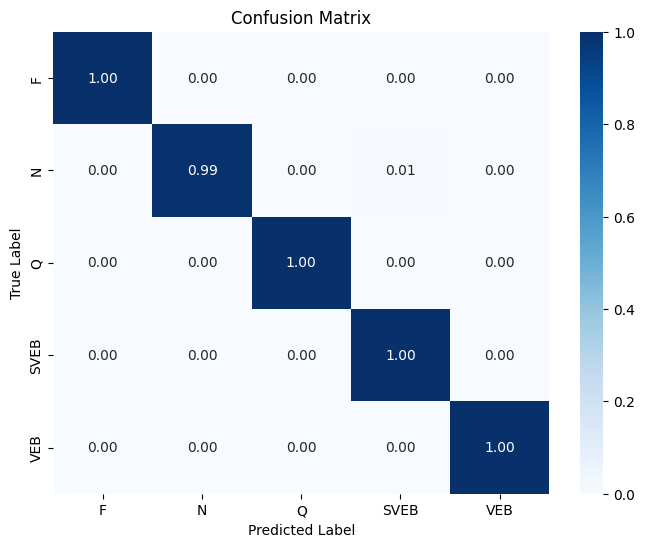

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Calculated precision, recall, F1-score, and Accuracy

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

           F       1.00      1.00      1.00     18304
           N       1.00      0.99      0.99     18061
           Q       1.00      1.00      1.00     17877
        SVEB       0.99      1.00      1.00     17943
         VEB       1.00      1.00      1.00     17898

    accuracy                           1.00     90083
   macro avg       1.00      1.00      1.00     90083
weighted avg       1.00      1.00      1.00     90083



### Final Result Visualization

Plotting the accuracy

<Figure size 1200x500 with 0 Axes>

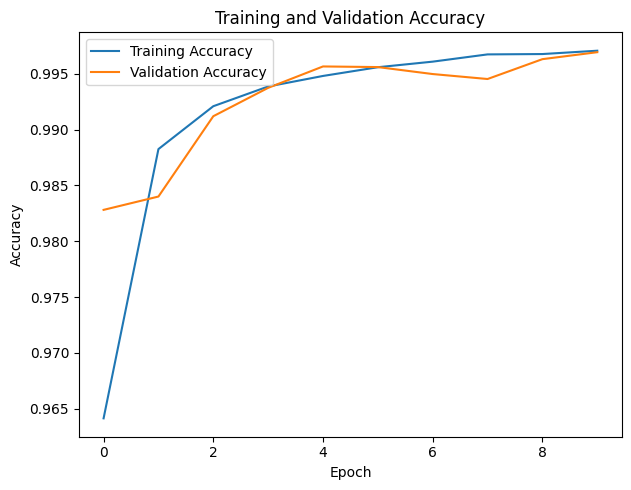

In [ ]:
plt.figure(figsize=(12, 5))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Plotting the loss

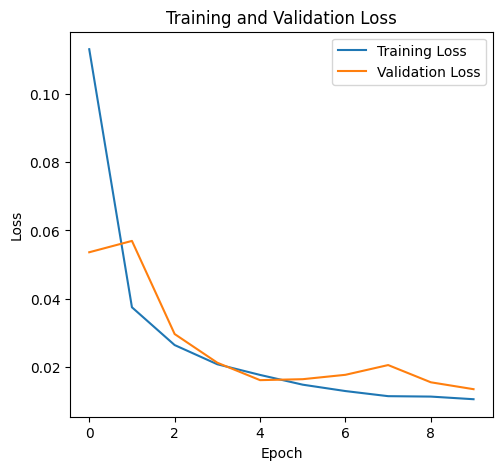

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Plotting validation accuracy

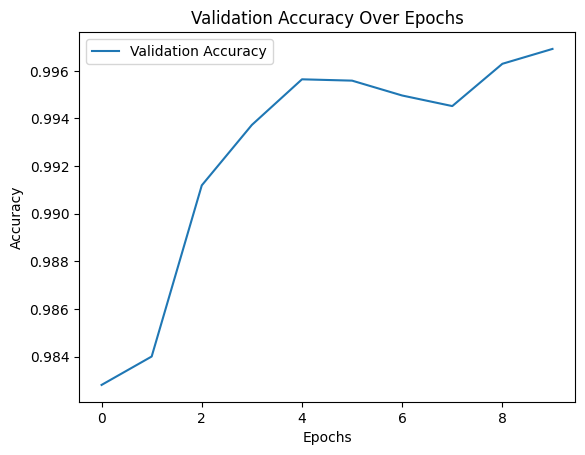

In [ ]:
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plotting validation loss

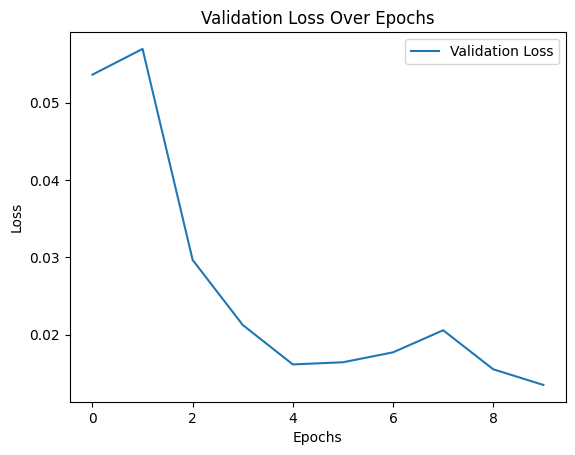

In [ ]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model summary

Unique classes in the dataset

In [ ]:
print("Unique classes in the dataset:", len(label_encoder.classes_))

Unique classes in the dataset: 5


About Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 128)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                4